In [54]:
# general imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# tensorflow imports
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
set_seed(142857)

# image reading and visualization tools
import cv2
import matplotlib.pyplot as plt
import visualkeras

# **PUT PATH TO FOLDER WITH DATA HERE**
file_path = '/spfda/datas/Dog Emotion/'

# defines basic dataset info
class_names = ['angry', 'happy', 'relaxed', 'sad']
num_classes = len(class_names)

# sets image size
img_size = (192,192,3)

In [55]:
# creates lists to which we will append each image and corresponding label
images = []
labels = []

# dataframe of dataset's csv labels
labels_df = pd.read_csv(f'{file_path}/labels.csv')
print(f"Dataframe of dataset's csv file:\n{labels_df.head()}")

# for each image, we will append it to our images list as an array, and append to our labels list a vector describing its label
for image in labels_df.iloc:
    images.append(np.asarray(cv2.resize(cv2.imread(file_path + image[2] + '/' + image[1], cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1]))

    lb = np.zeros(num_classes)
    lb[class_names.index(image[2])] = 1
    labels.append(lb)

# changes lists to arrays to feed our CNN
labels = np.asarray(labels)
images = np.asarray(images)

# prints some entries and shapes of our arrays to demonstrate
print(f'\nLabel vectors of first 5 images:\n{labels[0:5]}')

print(f'\nLabels array shape: {labels.shape}')
print(f'Images array shape: {images.shape}')


Dataframe of dataset's csv file:
   Unnamed: 0                               filename    label
0           0  yubL63eiiPmoRru8Z2K2yRo0NnGDCL683.jpg      sad
1           1  c1tVljKiLM9q2zTBuQGWpxmzBuSeBR437.jpg      sad
2           2  RbzNOvY5GIAl3PSjIRTKpEkQs1NByq575.jpg    angry
3           3  gKujaBuWYezz0yWK9ydTFVi6LbQtXe397.jpg    angry
4           4  U0hJ2ryOu1IOuYpc01O7RngPYa8Xvz795.jpg  relaxed

Label vectors of first 5 images:
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

Labels array shape: (4000, 4)
Images array shape: (4000, 192, 192, 3)


In [56]:
# splits our data into a training set (85%) and testing set (15%)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=142857)
print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\ntest images shape: {X_test.shape}\ntest labels shape: {y_test.shape}\n')

train images shape: (3400, 192, 192, 3)
train labels shape: (3400, 4)

test images shape: (600, 192, 192, 3)
test labels shape: (600, 4)



In [57]:
# Build our convolutional neural network. We have named her Natalie.
natalie = Sequential()

# Rescaling letter to simplify images and set image size
natalie.add(Rescaling(scale=1. / 255, input_shape=(img_size)))

# First two convolutional layers, then a pooling layer
natalie.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
natalie.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
natalie.add(MaxPooling2D(pool_size=2))

# Next two convolutional layers, then a pooling layer
natalie.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
natalie.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
natalie.add(MaxPooling2D(pool_size=2))

# Convolution is 2D, but our final dense layers want 1D, so we use Flatten()
natalie.add(Flatten())

# A few standard dense layers we pass our data through
natalie.add(Dense(128, activation='relu'))
natalie.add(Dense(64, activation='relu'))
natalie.add(Dense(num_classes, activation='softmax'))

# Compiles/creates Natalie with adamax optimizer, a categorical loss function, and the desired metric of accuracy
natalie.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

# Prints out a quick summary of our overall network
natalie.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 192, 192, 3)       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 192, 192, 64)      1792      
                                                                 
 conv2d_45 (Conv2D)          (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 96, 96, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 96, 96, 128)       32896     
                                                                 
 conv2d_47 (Conv2D)          (None, 96, 96, 128)       65664     
                                                      

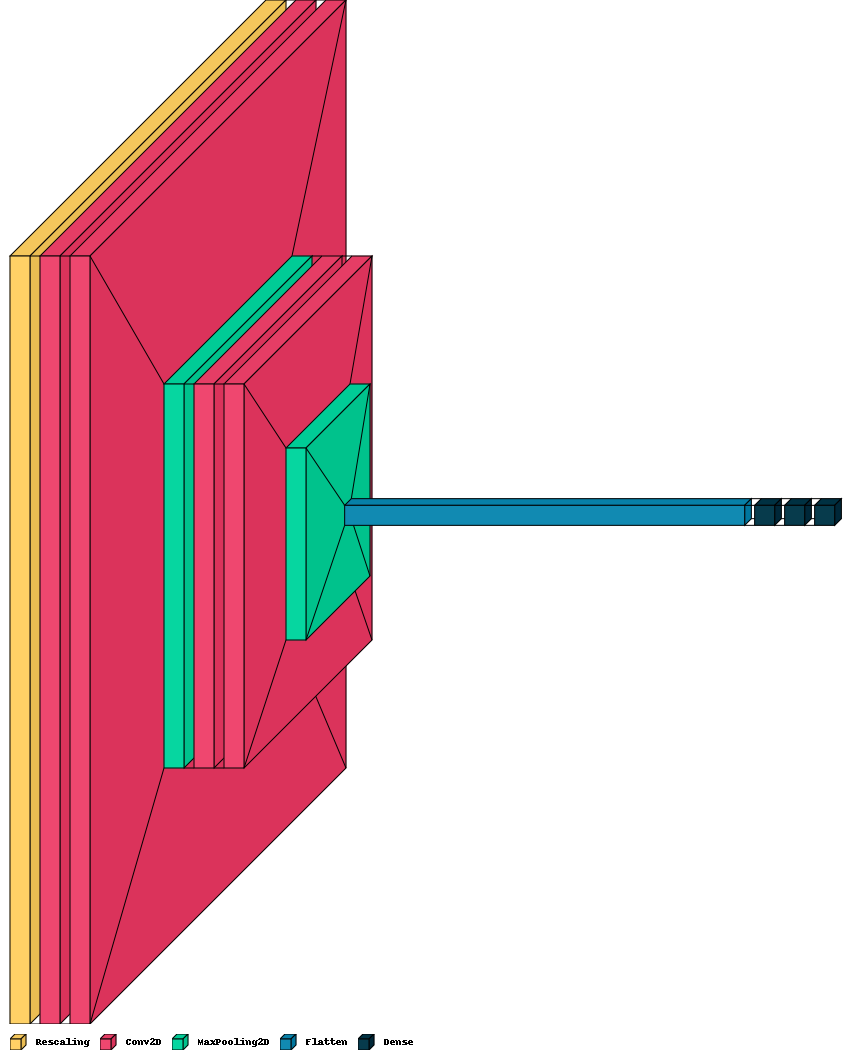

In [59]:
visualkeras.layered_view(natalie, legend=True)

In [5]:
# Creates a folder in which we will store Natalie's progress
checkpoint = ModelCheckpoint('natalie/model{epoch:02d}')

In [6]:
# Fits our network in 7 epochs, saving progress after each epoch
fit_natalie = natalie.fit(images, labels, epochs=7, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/7
125/125 [==============================] - ETA: 0s - loss: 1.4772 - accuracy: 0.3120

INFO:tensorflow:Assets written to: natalie\model01\assets


INFO:tensorflow:Assets written to: natalie\model01\assets


125/125 [==============================] - 419s 3s/step - loss: 1.4772 - accuracy: 0.3120 - val_loss: 1.2799 - val_accuracy: 0.4233
Epoch 2/7
125/125 [==============================] - ETA: 0s - loss: 1.2319 - accuracy: 0.4065

INFO:tensorflow:Assets written to: natalie\model02\assets


INFO:tensorflow:Assets written to: natalie\model02\assets


125/125 [==============================] - 404s 3s/step - loss: 1.2319 - accuracy: 0.4065 - val_loss: 1.1881 - val_accuracy: 0.4350
Epoch 3/7
125/125 [==============================] - ETA: 0s - loss: 1.1177 - accuracy: 0.4910

INFO:tensorflow:Assets written to: natalie\model03\assets


INFO:tensorflow:Assets written to: natalie\model03\assets


125/125 [==============================] - 425s 3s/step - loss: 1.1177 - accuracy: 0.4910 - val_loss: 0.9844 - val_accuracy: 0.6017
Epoch 4/7
125/125 [==============================] - ETA: 0s - loss: 0.9352 - accuracy: 0.6010

INFO:tensorflow:Assets written to: natalie\model04\assets


INFO:tensorflow:Assets written to: natalie\model04\assets


125/125 [==============================] - 387s 3s/step - loss: 0.9352 - accuracy: 0.6010 - val_loss: 0.7305 - val_accuracy: 0.7367
Epoch 5/7
125/125 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.7350

INFO:tensorflow:Assets written to: natalie\model05\assets


INFO:tensorflow:Assets written to: natalie\model05\assets


125/125 [==============================] - 404s 3s/step - loss: 0.6694 - accuracy: 0.7350 - val_loss: 0.4151 - val_accuracy: 0.8883
Epoch 6/7
125/125 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.8612

INFO:tensorflow:Assets written to: natalie\model06\assets


INFO:tensorflow:Assets written to: natalie\model06\assets


125/125 [==============================] - 392s 3s/step - loss: 0.3861 - accuracy: 0.8612 - val_loss: 0.1954 - val_accuracy: 0.9583
Epoch 7/7
125/125 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9452

INFO:tensorflow:Assets written to: natalie\model07\assets


INFO:tensorflow:Assets written to: natalie\model07\assets


125/125 [==============================] - 414s 3s/step - loss: 0.1710 - accuracy: 0.9452 - val_loss: 0.0573 - val_accuracy: 0.9883


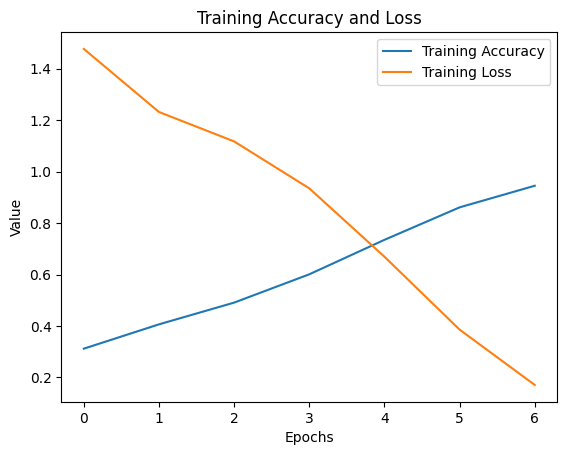

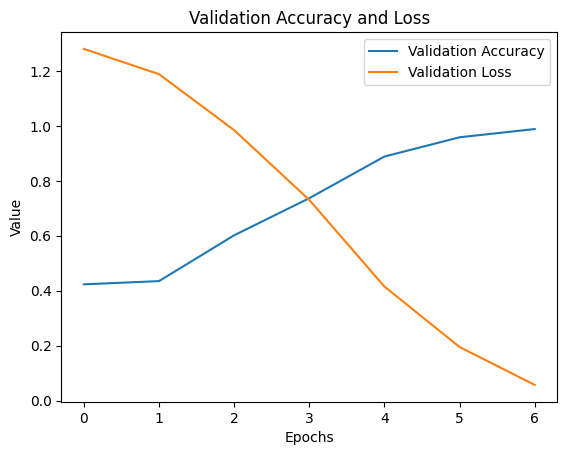

In [7]:
# Graphs our metrics over time to visualize the training process
accuracy = fit_natalie.history['accuracy']
val_accuracy = fit_natalie.history['val_accuracy']
loss = fit_natalie.history['loss']
val_loss = fit_natalie.history['val_loss']

epochs = range(len(accuracy))

# Training Accuarcy & Training Loss graph
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Accuracy and Loss')

# Validation/Test Accuracy and Loss graph
plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Validation Accuracy and Loss')

plt.show()

1/1 [==============================] - 0s 57ms/step

Correctly analyzed 48 out of the first 49 images


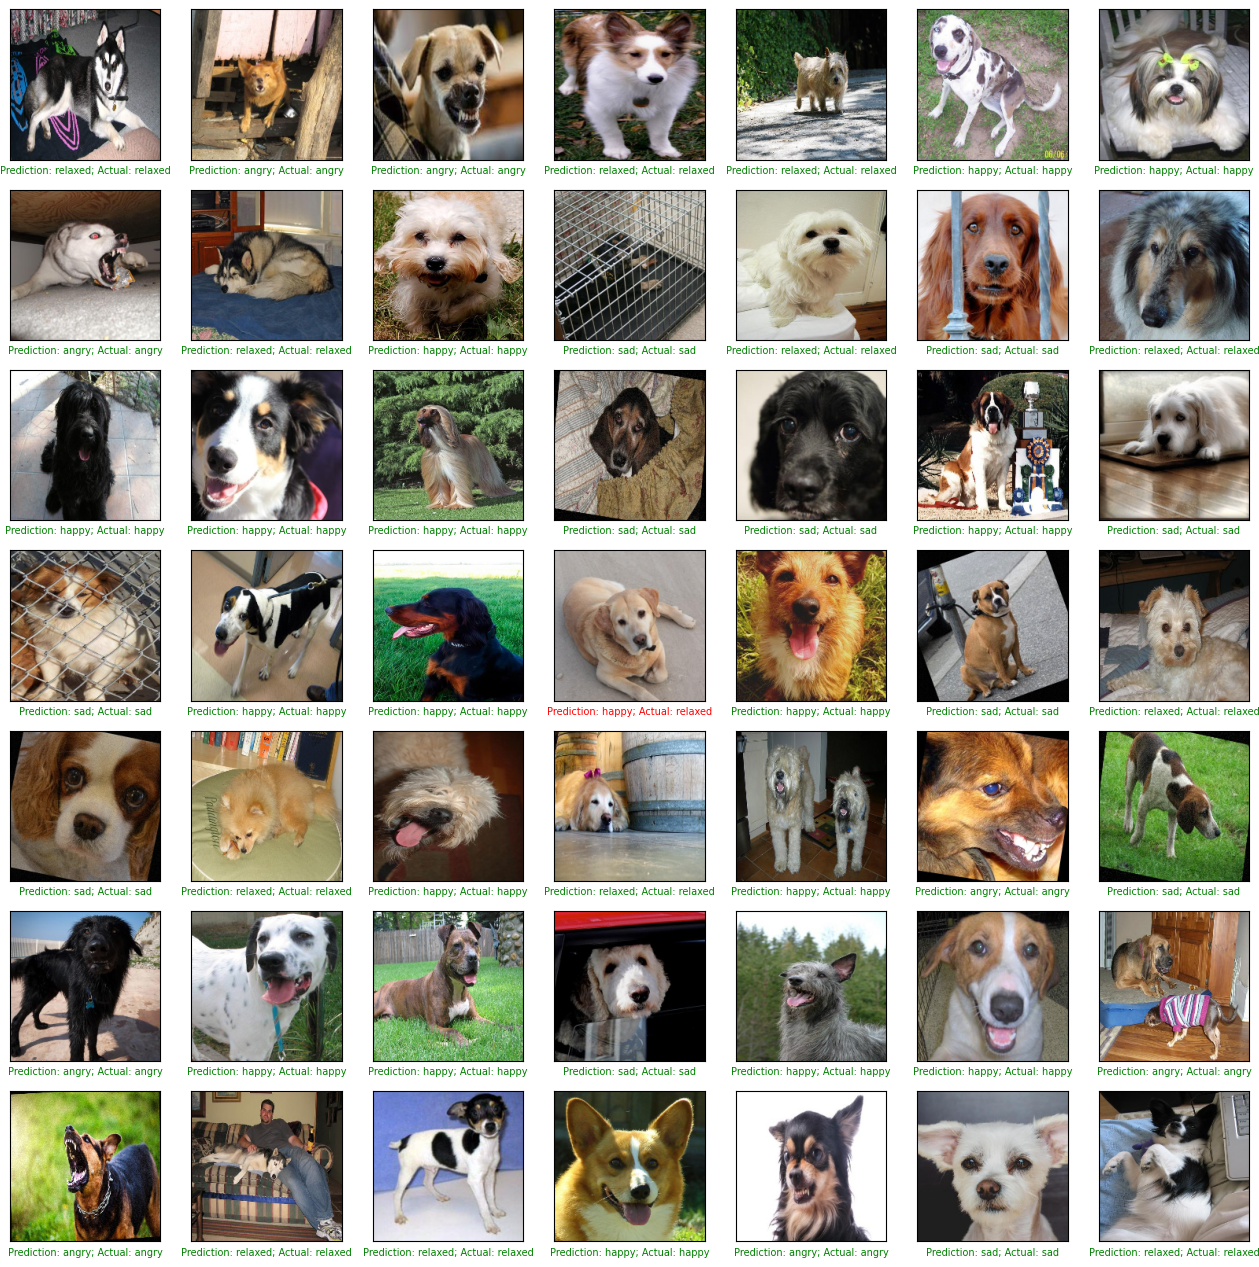

In [24]:
# We already know the test accuracy of our model (99.83%). But, here we'll analyzes the first 49 test images to demonstrate.
i = 0
total_correct = 0
images = []

for x in range(49):
    prediction = natalie.predict(X_test[x][None, ...])
    pred_class = class_names[np.argmax(prediction)]
    real_class = class_names[np.argmax(y_test[x])]

    # If image is correct, add to total_correct and set color to green. If not, set color to red.
    if pred_class == real_class:
        total_correct += 1
        color = 'green'
    else:
        color = 'red'   
    
    # Store each image in our list along with their predicted class, actual class, and color 
    images.append((X_test[i], pred_class, real_class, color))
    i += 1

print(f'\nCorrectly analyzed {total_correct} out of the first {i} images')

# Displays these 49 pictures with their prediction and actual classes. Label color is green if prediction matches actual, and red if it does not. 
fig, axs = plt.subplots(7, 7, figsize=(16, 16))

i = 0
for x in range(7):
    for y in range(7):
        axs[x][y].imshow(images[i][0])
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'Prediction: {images[i][1]}; Actual: {images[i][2]}', fontsize = 7)
        axs[x][y].xaxis.label.set_color(images[i][3])
        i += 1

plt.show()
